### Brain Scan Preprocessing

Goal: Understand data organization, general patterns, and visualize data before applying deep learning techniques

In [1]:
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['image.cmap'] = 'gray'
import csv

# brain scan visualization libraries
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

metadata_path = os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "participants_add.csv")
metadata_path


'c:\\Users\\maana\\Desktop\\UNC\\research\\research_dataset\\participants_add.csv'

In [2]:

# parse and store patient metadata into hashmap for efficient access
patient_metadata = {}
with open(metadata_path) as csvfile:
    reader = csv.reader(csvfile)
    keys = next(reader)
    for row in reader:
        data_list = []
        for i, v in enumerate(keys):
            data_list.append({v:row[i]})
        patient_metadata.update({str(row[0]): data_list})

patient_data_paths = os.listdir("../research_dataset/raw")
patient_data_paths = [os.path.join(os.path.dirname(os.getcwd()), "research_dataset/raw", x) for x in patient_data_paths]
#patient_data_paths

In [3]:
from pprint import pprint
#pprint(patient_metadata)

T2 Scan


<Figure size 720x504 with 0 Axes>

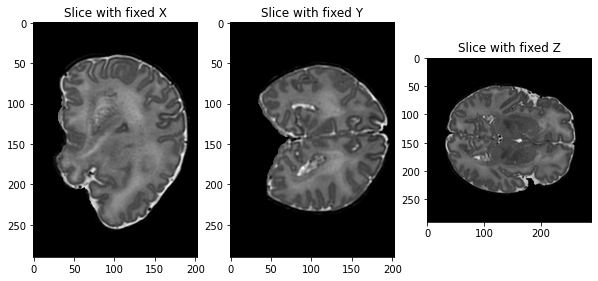

T1 Scan


<Figure size 720x504 with 0 Axes>

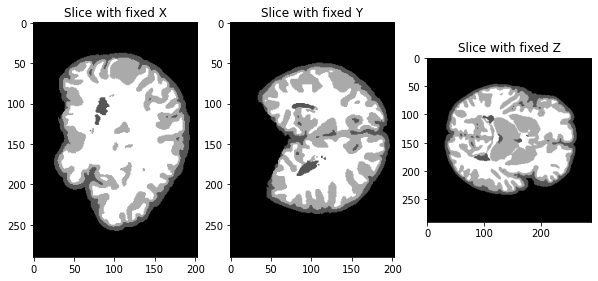

(290, 290, 203)


In [4]:
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def path_to_array(path):
    image_array = nib.load(path)
    image_array = image_array.get_fdata()
    return np.array(image_array)

# show slices from scan array along each axis
def show_scan_slices(sample_element, scan_type, x=100):
    print("{} Scan".format(scan_type))
    plt.figure()
    f, axarr = plt.subplots(1,3) 
    plt.title("Brain Scan Slices")

    axarr[0].imshow(sample_element[x])
    axarr[0].title.set_text("Slice with fixed X")
    axarr[1].imshow(sample_element[:,x])
    axarr[1].title.set_text("Slice with fixed Y")
    axarr[2].imshow(sample_element[:,:,x])
    axarr[2].title.set_text("Slice with fixed Z")

    plt.show()


# two different scan types present in each patient scan folder
sample_element_T2 = path_to_array(os.path.join(patient_data_paths[0], "ses-11300_NoMyeline", "sub-CC00058XX09_ses-11300_desc-restore_T2w.rmcere.nii.gz"))
sample_element_T1 = path_to_array(os.path.join(patient_data_paths[0], "ses-11300_NoMyeline", "sub-CC00058XX09_ses-11300_tissue_rmcere.ZWStyle.nii.gz"))

show_scan_slices(sample_element_T2, scan_type="T2")
show_scan_slices(sample_element_T1, scan_type="T1")

print(sample_element_T1.shape)


In [5]:
# find min and max vals for normalization
max_v = 0
min_v = 0
for f in os.listdir(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T2w")):
    arr = path_to_array(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T2w", f))
    mx, mn = np.amax(arr), np.amin(arr)
    if mx > max_v:
        max_v = mx
    if mn < min_v:
        min_v = mn

print(min_v, max_v)

0 87.74905395507812


In [6]:
# find min and max vals for normalization
max_v = 0
min_v = 0
for f in os.listdir(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T1w")):
    arr = path_to_array(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T1w", f))
    mx, mn = np.amax(arr), np.amin(arr)
    if mx > max_v:
        max_v = mx
    if mn < min_v:
        min_v = mn

print(min_v, max_v)

0 3.0


In [7]:
# check for images that are not shape: (290, 290, 203)
# 34 samples are shape (217, 290, 290) -- need to adjust padding for these samples

def reshape_samples(x):
    x = x[:,:,67:-20] # slice z down to 203
    p1, p2 = np.zeros((36, 290, 203)), np.zeros((37, 290, 203))
    x = np.concatenate((p1, x, p2), axis=0) # pad x up to 290 by evenly concatinating zero 290*203 tensors
    return x

# visually verify minority reshaped samples are close to majority sample
for f in os.listdir(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T2w"))[:3]:
    arr = path_to_array(os.path.join(os.path.dirname(os.getcwd()), "research_dataset", "ds", "T2w", f))
    if arr.shape != (290, 290, 203):
        # pad x up to 290
        arr = reshape_samples(arr)
        show_scan_slices(arr, "T2w")
        print(arr.shape)




